In [5]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

Loading the relevant datasets

In [6]:
review_df = pd.read_json('./reviews_Electronics_5.json/Electronics_5.json', orient='records', lines=True)

In [7]:
review_df = review_df.rename(columns={'overall': 'Rating'})

print ("Total data:", str(review_df.shape))
review_df.head()

Total data: (1689188, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [8]:
review_df.shape

(1689188, 9)

In [9]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

dfmeta = getDF('./meta_Electronics1.json.gz')

In [10]:
dfmeta.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [11]:
dfmeta.shape

(498196, 9)

In [12]:
dfmeta.to_csv('meta_big.csv',index=False)

Merging the datasets

In [13]:
product_reviews=pd.merge(review_df,dfmeta,on='asin',how='left')

In [14]:
product_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [15]:
product_reviews.shape

(1689188, 17)

Information about features of combined dataset

In [16]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   Rating          1689188 non-null  int64  
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
 9   imUrl           1687975 non-null  object 
 10  description     1655511 non-null  object 
 11  categories      1689188 non-null  object 
 12  title           1643686 non-null  object 
 13  price           1639882 non-null  float64
 14  salesRank       810070 non-null   object 
 15  related         1662142 non-null  object 
 16  brand           954251 non-null   ob

Checking for null values by column

In [17]:
product_reviews.isnull().sum()

reviewerID             0
asin                   0
reviewerName       24730
helpful                0
reviewText             0
Rating                 0
summary                0
unixReviewTime         0
reviewTime             0
imUrl               1213
description        33677
categories             0
title              45502
price              49306
salesRank         879118
related            27046
brand             734937
dtype: int64

Data wrangling

In [18]:
product_reviews2=product_reviews.dropna(subset=['title'])

In [19]:
product_reviews2.shape

(1643686, 17)

In [20]:
product_reviews2.title.unique()

array(['Rand McNally 528881469 7-inch Intelliroute TND 700 Truck GPS',
       'Barnes &amp; Noble HDTV Adapter Kit for NOOK HD and NOOK HD+',
       'Barnes &amp; Noble OV/HB-ADP Universal Power Kit', ...,
       'Sabrent Wifi Audio Receiver (Supports DLNA and AirPlay) for Home Stereo, Portable Speakers (WF-RADU)',
       'NEW! Creative Sound Blaster Roar: Portable NFC Bluetooth Wireless Speaker with aptX/AAC. 5 Drivers, Built-in Subwoofer, Incredibly Powerful. Amazing Price of $149.99!',
       'Brainwavz S5 In Ear Headphones'], dtype=object)

In [21]:
product_reviews_hp = product_reviews2[product_reviews2["title"].str.contains("headphones|headphone|Headphones|Headphone")]

In [22]:
product_reviews_hp.shape

(64305, 17)

In [23]:
product_reviews_hp.isnull().sum()

reviewerID            0
asin                  0
reviewerName        783
helpful               0
reviewText            0
Rating                0
summary               0
unixReviewTime        0
reviewTime            0
imUrl                 0
description        1431
categories            0
title                 0
price               750
salesRank         42676
related            1009
brand             22699
dtype: int64

In [24]:
product_reviews_hp[product_reviews_hp['brand'].isnull()]

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,"[11, 11]",I've been using these for over a year now. Ba...,4,"Good sound, Good Noise Cancelling, Good for ai...",1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""","[12, 13]",I will admit that I recently gave up my Sony H...,5,Best Noise Cancelling Headphones,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,"[8, 9]",I bought these thinking they were the ticket t...,3,Not what I'd hoped for.,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""","[0, 0]",I've owned these for years. I used to fly two ...,5,"The ""Get Smart"" Cone of Silence has finally be...",1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,"[10, 12]",I have used the headphones for 2 years -- they...,5,Great product,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,5,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,5,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,5,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",5,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014",http://ecx.images-amazon.com/image

In [25]:
product_reviews_hp.loc[product_reviews_hp.brand.isnull(),'brand'] = product_reviews_hp.title.str.split().str.get(0)

In [26]:
product_reviews_hp[product_reviews_hp['brand'].isnull()]

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand


In [27]:
product_reviews_hp.isnull().sum()

reviewerID            0
asin                  0
reviewerName        783
helpful               0
reviewText            0
Rating                0
summary               0
unixReviewTime        0
reviewTime            0
imUrl                 0
description        1431
categories            0
title                 0
price               750
salesRank         42676
related            1009
brand                 0
dtype: int64

In [28]:
product_reviews_hp2=product_reviews_hp.drop('salesRank',axis=1)

In [29]:
product_reviews_hp3=product_reviews_hp2.dropna(subset=['reviewerName','description','price','related'])

In [30]:
product_reviews_hp3.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
Rating            0
summary           0
unixReviewTime    0
reviewTime        0
imUrl             0
description       0
categories        0
title             0
price             0
related           0
brand             0
dtype: int64

In [31]:
product_reviews_hp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61133 entries, 1260 to 1689187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      61133 non-null  object 
 1   asin            61133 non-null  object 
 2   reviewerName    61133 non-null  object 
 3   helpful         61133 non-null  object 
 4   reviewText      61133 non-null  object 
 5   Rating          61133 non-null  int64  
 6   summary         61133 non-null  object 
 7   unixReviewTime  61133 non-null  int64  
 8   reviewTime      61133 non-null  object 
 9   imUrl           61133 non-null  object 
 10  description     61133 non-null  object 
 11  categories      61133 non-null  object 
 12  title           61133 non-null  object 
 13  price           61133 non-null  float64
 14  related         61133 non-null  object 
 15  brand           61133 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 7.9+ MB


In [32]:
product_reviews_hp3.to_csv('product_reviews_1.csv', sep=',', encoding='utf-8', index = False)

In [33]:
# product_reviews_hp3 = pd.read_csv('./product_reviews_1.csv')

In [34]:
product_reviews_hp3['review_text'] = product_reviews_hp3[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_hp4 = product_reviews_hp3.drop(['reviewText', 'summary'], axis = 1)
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,"[11, 11]",4,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai..."
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""","[12, 13]",5,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,"[8, 9]",3,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""","[0, 0]",5,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be..."
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,"[10, 12]",5,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...


In [35]:
product_reviews_hp4['review_text'][1263]

'The "Get Smart" Cone of Silence has finally been perfected. I\'ve owned these for years. I used to fly two round trips a week, and I wore these constantly, whether or not there was any reason to (in flight entertainment, a CD player).The first benefit is that the noise reduction made speech more audible. I could hear the person in the next seat better, and, in fact, I found that I could eavesdrop on people a row or two away, since the noise that would normally have masked their conversation was masked, but the speech came through.The loud, constant background sound in airplanes is very draining. I was more likely to be able to nap with these on, and I was more likely to be able to concentrate on reading with less background noise.Don\'t get a unit that simply insulates the sound - you might as well use earplugs or sealing earbuds. There is nothing wrong with that solution, it is just that the solution of generated countersound (exactly out of phase, exactly the right amount and freque

In [36]:
list_positive = []
list_negative = []

for help in product_reviews_hp4['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
product_reviews_hp4['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
product_reviews_hp4['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
product_reviews_hp4 = product_reviews_hp4.drop('helpful', axis = 1)
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2


In [37]:
good_rate = len(product_reviews_hp4[product_reviews_hp4['Rating'] >= 3])
bad_rate = len(product_reviews_hp4[product_reviews_hp4['Rating'] < 3])

print ('Good ratings : {} reviews for Heaphones products'.format(good_rate))
print ('Bad ratings : {} reviews for Headphones products'.format(bad_rate))

Good ratings : 52810 reviews for Heaphones products
Bad ratings : 8323 reviews for Headphones products


In [38]:
product_reviews_hp4['rating_class'] = product_reviews_hp4['Rating'].apply(lambda x: 'bad' if x < 3 else'good')
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good


In [39]:
product_reviews_hp4['help_prop'] = product_reviews_hp4.pos_feedback.div((product_reviews_hp4.pos_feedback+product_reviews_hp4.neg_feedback), axis=0)
product_reviews_hp4

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,NaN
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""",5,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Boom -- Pop -- Pow. These deliver. Burned the...,1,0,good,1.000000
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""",5,1405382400,"07 15, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,"Thin and light, without compromising on sound ...",0,0,good,NaN
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,5,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Same form factor and durability as the S1 with...,0,0,good,NaN
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,5,1405641600,"07 18, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Superb audio quality in a very comfortable set...,0,0,good,NaN


In [40]:
product_reviews_hp4['help_prop'].fillna(0, inplace=True)

In [41]:
product_reviews_hp4[product_reviews_hp4.duplicated(['reviewerName','unixReviewTime','asin'],keep= False)]

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop
601823,A23V9XZWUFEWWX,B002HWJT1A,Paul,5,1356566400,"12 27, 2012",http://ecx.images-amazon.com/images/I/41RgSp8Y...,,"[[Electronics, Accessories & Supplies, Audio &...",Audio-Technica ATH-ANC7B QuietPoint Active Noi...,152.99,"{'also_bought': ['B000067RC4', 'B0083J7EUO', '...",Audio-Technica,excellent noise canceling Excellent sound qual...,0,0,good,0.0
601824,A2RMTTDT5Z6G86,B002HWJT1A,Paul,5,1356566400,"12 27, 2012",http://ecx.images-amazon.com/images/I/41RgSp8Y...,,"[[Electronics, Accessories & Supplies, Audio &...",Audio-Technica ATH-ANC7B QuietPoint Active Noi...,152.99,"{'also_bought': ['B000067RC4', 'B0083J7EUO', '...",Audio-Technica,Excellent value for headphones with active-noi...,0,0,good,0.0
760353,AM67VZ3Z4HUTR,B003ELYQGG,Amazon Customer,5,1380672000,"10 2, 2013",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Panasonic RPHJE120S In-Ear Headphones Fantasti...,0,0,good,0.0
760357,APKFIZH7HLZ6X,B003ELYQGG,Amazon Customer,1,1380672000,"10 2, 2013",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Flat. Tinny. No Bass I can't recommend these a...,0,0,bad,0.0
760617,A1VA4Z4B7Y74KY,B003ELYQGG,Brad,3,1404777600,"07 8, 2014",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Three Stars Cheap,0,0,good,0.0
760620,A2WOPG3K518RN6,B003ELYQGG,Brad,5,1404777600,"07 8, 2014",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,"There are better sounding earphones, but you'l...",0,0,good,0.0
1670869,A3US4KS743CHAR,B00GMFYM8I,Amazon Customer,5,1398038400,"04 21, 2014",http://ecx.images-amazon.com/images/I/41-0kBLi...,"""Here's The Super Simple Way To Add The Latest...","[[Electronics, Computers & Accessories, Networ...",Mediastic USB Bluetooth Adapter - Latest V4.0 ...,14.95,"{'also_bought': ['B00GS7SKQK', 'B004YDTIP2', '...",Mediastic,Great product I have an older desktop computer...,0,0,good,0.0
1670870,A27UJPP9SQWGDO,B00GMFYM8I,Amazon Customer,4,1398038400,"04 21, 2014",http://ecx.images-amazon.com/images/I/41-0kBLi...,"""Here's The Super Simple Way To Add The Latest...","[[Electronics, Computers & Accessories, Networ...",Mediastic USB Bluetooth Adapter - Latest V4.0 ...,14.95,"{'also_bought': ['B00GS7SKQK', 'B004YDTIP2', '...",Mediastic,Great product for the price This was a fast an...,0,0,good,0.0


In [42]:
product_reviews_hp4.shape

(61133, 18)

In [43]:
# Droping 'reviewName' and 'unixReviewTime'columns
product_reviews_hp4 = product_reviews_hp4.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')

In [44]:
product_reviews_hp4.shape

(61129, 18)

In [45]:
# Converting time object to datetime and create a new column named 'time'
product_reviews_hp4['time'] = product_reviews_hp4.reviewTime.str.replace(',', "")
product_reviews_hp4['time'] = pd.to_datetime(product_reviews_hp4['time'], format = '%m %d %Y')
# Droping redundant 'reviewTime' column
product_reviews_hp4 = product_reviews_hp4.drop('reviewTime', axis = 1)
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,Rating,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop,time
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5,1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05


In [46]:
product_reviews_hp4.columns

Index(['reviewerID', 'asin', 'reviewerName', 'Rating', 'unixReviewTime',
       'imUrl', 'description', 'categories', 'title', 'price', 'related',
       'brand', 'review_text', 'pos_feedback', 'neg_feedback', 'rating_class',
       'help_prop', 'time'],
      dtype='object')

In [47]:
# Renaming the columns
product_reviews_hp4.columns = ['reviewer_id', 'product_id',
                               'reviewer_name','rating','unix_review_time','url',
                               'description','categories','product_title','price',
                               'related','brand_name','review_text','pos_feedback', 
                               'neg_feedback', 'rating_class', 'help_prop','review_time']
# Sample observation
product_reviews_hp4.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,url,description,categories,product_title,price,related,brand_name,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5,1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05


In [48]:
print ("================================================")

### Total reviews
total = len(product_reviews_hp4)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_hp4.reviewer_id.unique()))
reviewer_prop = float(len(product_reviews_hp4.reviewer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews_hp4.product_id.unique()))
product_prop = float(len(product_reviews_hp4.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_hp4.rating.mean(),3))

### Average helpful ratio
print ("Average helpfull ratio score: ",round(product_reviews_hp4.help_prop.mean(),3))


print ("================================================")

Number of reviews:  61129

Number of unique reviewers:  42062
Prop of unique reviewers:  0.688

Number of unique products:  1878
Prop of unique products:  0.031

Average rating score:  4.056
Average helpfull ratio score:  0.351


In [49]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reviewer_id       61129 non-null  object        
 1   product_id        61129 non-null  object        
 2   reviewer_name     61129 non-null  object        
 3   rating            61129 non-null  int64         
 4   unix_review_time  61129 non-null  int64         
 5   url               61129 non-null  object        
 6   description       61129 non-null  object        
 7   categories        61129 non-null  object        
 8   product_title     61129 non-null  object        
 9   price             61129 non-null  float64       
 10  related           61129 non-null  object        
 11  brand_name        61129 non-null  object        
 12  review_text       61129 non-null  object        
 13  pos_feedback      61129 non-null  int64         
 14  neg_feedback     

In [50]:
#Summary statistics
product_reviews_hp4[['rating','pos_feedback','neg_feedback','help_prop']].describe()

,rating,pos_feedback,neg_feedback,help_prop
count,61129.000000,61129.000000,61129.000000,61129.000000
mean,4.056438,3.082269,0.641709,0.350887
std,1.217506,31.516073,2.777990,0.442493
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.947368
max,5.000000,3800.000000,144.000000,1.000000


EDA

Text(0, 0.5, 'Number of Reviews')

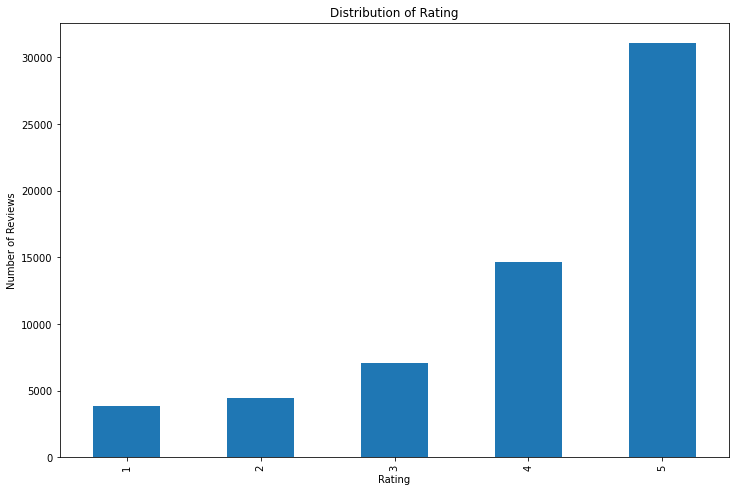

In [51]:
# Bar-plot showing distribution of ratings 
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_hp4['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [52]:
#Number of reviews per rating class
class_counts = product_reviews_hp4.groupby('rating').size()
class_counts

rating
1     3870
2     4452
3     7102
4    14639
5    31066
dtype: int64

In [53]:
product_reviews_hp4['rating_class'].value_counts()

good    52807
bad      8322
Name: rating_class, dtype: int64

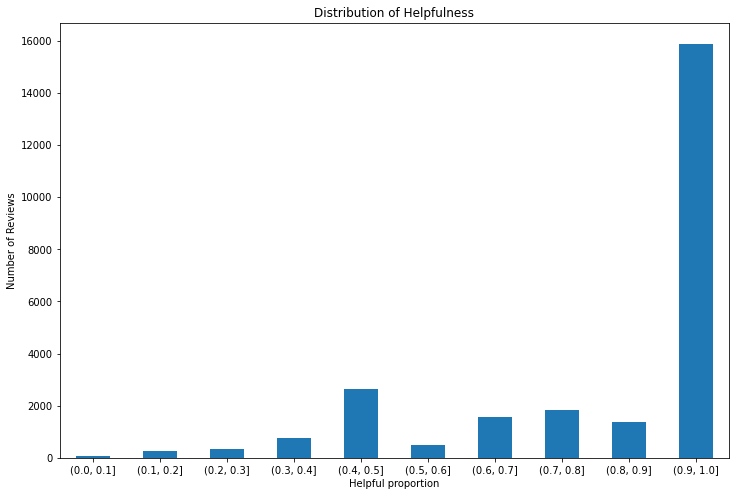

In [54]:
#Distribution of helpfulness
plt.figure(figsize=(12,8))
cutoff = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
Dist_help = product_reviews_hp4.groupby([pd.cut(product_reviews_hp4['help_prop'], bins = cutoff)]).size()
Dist_help.plot(kind='bar')
plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [55]:
# Print the number of positive feedback

pos = len(product_reviews_hp4[product_reviews_hp4['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))

# Print the number of negative feedback

neg = len(product_reviews_hp4[product_reviews_hp4['neg_feedback'] > 0])      
print('\nNumber of negative feedbacks: {}'.format(neg))

Number of positive feedbacks: 25222

Number of negative feedbacks: 14202


In [56]:
product_reviews_hp5 = product_reviews_hp4[product_reviews_hp4['pos_feedback'] == 0]
product_reviews_hp6 = product_reviews_hp5[product_reviews_hp5['neg_feedback']==0]
product_reviews_hp6.shape

(32049, 18)

In [57]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_hp4['reviewer_id'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_hp4['product_id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['reviewer_id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['product_id'].unique()))))


Number of unique customers : 42062

Number of unique products : 1878

Review per customer: 1.4533070229660976

Review per product: 32.550053248136315


Text Preprocessing

In [69]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer
import re
import contractions
from contractions import contractions_dict

[nltk_data] Downloading package punkt to C:\Users\Anjishnu
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anjishnu
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anjishnu
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews_hp4["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 10131895


In [79]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



# Define function to expand contractions
def expand_contractions(text):
    # contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),flags=re.IGNORECASE|re.DOTALL)
    # def expand_match(contraction):
    #     match = contraction.group(0)
    #     first_char = match[0]
    #     expanded_contraction = contractions_dict.get(match)\
    #                     if contractions_dict.get(match)\
    #                     else contractions_dict.get(match.lower())
    #     expanded_contraction = first_char+expanded_contraction[1:]
    #     return expanded_contraction
    
    # expanded_text = contractions_pattern.sub(expand_match, text)
    # expanded_text = re.sub("'", "", expanded_text)
    expanded_text = contractions.fix(text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [80]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [81]:
product_reviews_hp4['clean_text'] = product_reviews_hp4['review_text'].map(lambda text: normalize_and_lemmaize(text))

In [82]:
product_reviews_hp4

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,url,description,categories,product_title,price,related,brand_name,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04,good sound good noise cancel good airplanes us...
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24,best noise cancel headphones admit recently gi...
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05,not would hop buy think ticket noisefree pleas...
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5,1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24,get smart cone silence finally perfect own yea...
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05,great product use headphones years offer mater...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""",5,1405555200,http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Boom -- Pop -- Pow. These deliver. Burned the...,1,0,good,1.000000,2014-07-17,boom pop pow deliver burn listen hours sine wa...
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""",5,1405382400,http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,"Thin and light, without compromising on sound ...",0,0,good,0.000000,2014-07-15,thin light without compromise sound quality ba...
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,5,1405555200,http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Same form factor and durability as the S1 with...,0,0,good,0.000000,2014-07-17,form factor durability better sound quality bi...
1689186,A1E1LEVQ9VQ

In [83]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reviewer_id       61129 non-null  object        
 1   product_id        61129 non-null  object        
 2   reviewer_name     61129 non-null  object        
 3   rating            61129 non-null  int64         
 4   unix_review_time  61129 non-null  int64         
 5   url               61129 non-null  object        
 6   description       61129 non-null  object        
 7   categories        61129 non-null  object        
 8   product_title     61129 non-null  object        
 9   price             61129 non-null  float64       
 10  related           61129 non-null  object        
 11  brand_name        61129 non-null  object        
 12  review_text       61129 non-null  object        
 13  pos_feedback      61129 non-null  int64         
 14  neg_feedback     

In [84]:
clean_tokens=len([w for t in (product_reviews_hp4["clean_text"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 4520829

Percentage of removed tokens: 0.55


In [85]:
product_reviews_hp4.to_csv('./clean_review_headphones.csv', sep=',', encoding='utf-8', index = False)

In [86]:
product_reviews_hp4.to_json('./clean_review_headphones.json')